In [18]:
import pandas  as pd

In [19]:
df = pd.read_csv('co-emissions-by-sector.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        6560 non-null   object 
 1   Code                                                          6208 non-null   object 
 2   Year                                                          6560 non-null   int64  
 3   Carbon dioxide emissions from buildings                       6421 non-null   float64
 4   Carbon dioxide emissions from industry                        6305 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry    6557 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion           6421 non-null   float64
 7   Carbon dioxide emissions from transport                       6421 no

In [20]:
df.describe()

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
count,6560.000000,6.421000e+03,6.305000e+03,6.557000e+03,6.421000e+03,6.421000e+03,6.421000e+03,2.270000e+03,6.421000e+03,6.421000e+03
mean,2005.500000,5.509696e+07,2.142031e+07,2.577066e+07,1.246594e+07,1.164675e+08,1.013822e+08,1.588207e+07,2.516014e+08,1.931317e+07
std,9.233796,2.525762e+08,1.187214e+08,2.464913e+08,5.762671e+07,5.786553e+08,5.153394e+08,4.129882e+07,1.216841e+09,9.489783e+07
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1997.750000,8.000000e+04,0.000000e+00,-6.700000e+05,0.000000e+00,5.800000e+05,1.600000e+05,4.800000e+05,2.100000e+05,6.000000e+04
50%,2005.500000,6.400000e+05,4.800000e+05,3.000000e+04,2.400000e+05,3.170000e+06,1.500000e+06,2.400000e+06,3.980000e+06,5.500000e+05
75%,2013.250000,7.500000e+06,2.990000e+06,9.940000e+06,2.060000e+06,1.841000e+07,1.338000e+07,6.890000e+06,3.398000e+07,3.200000e+06
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,3.227600e+08,1.622524e+10,1.325790e+09


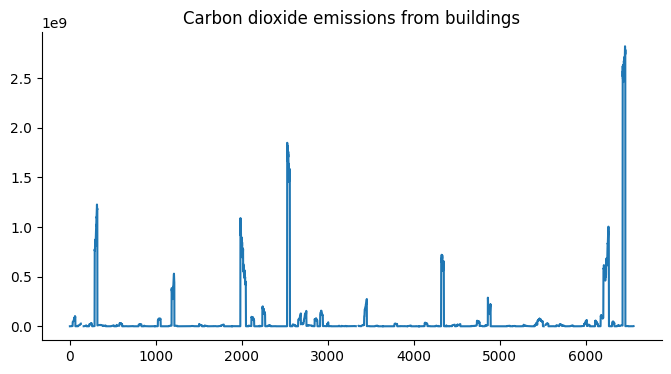

In [21]:
from matplotlib import pyplot as plt
df['Carbon dioxide emissions from buildings'].plot(kind='line', figsize=(8, 4), title='Carbon dioxide emissions from buildings')
plt.gca().spines[['top', 'right']].set_visible(False)

In [25]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values by Column:")
print(missing_values)

# Option 1: Replace missing values with 0 (if missing indicates no emissions)
df.fillna(0, inplace=True)

# Option 2: Replace missing values with the column mean (if applicable)
# df['Fugitive emissions of carbon dioxide from energy production'].fillna(
#     df['Fugitive emissions of carbon dioxide from energy production'].mean(), inplace=True)

# Verify that all missing values are handled
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values by Column:
Entity                                                             0
Code                                                             352
Year                                                               0
Carbon dioxide emissions from buildings                          139
Carbon dioxide emissions from industry                           255
Carbon dioxide emissions from land use change and forestry         3
Carbon dioxide emissions from other fuel combustion              139
Carbon dioxide emissions from transport                          139
Carbon dioxide emissions from manufacturing and construction     139
Fugitive emissions of carbon dioxide from energy production     4290
Carbon dioxide emissions from electricity and heat               139
Carbon dioxide emissions from bunker fuels                       139
dtype: int64

Missing Values After Imputation:
Entity                                                          0
Code                             

In [26]:
# Handling missing 'Code' values
df['Code'] = df['Code'].fillna("Unknown")

# Handling missing numeric columns
numeric_cols = df.columns[3:]  # Columns with emission data
for col in numeric_cols:
    if col == "Fugitive emissions of carbon dioxide from energy production":
        df[col] = df[col].fillna(0)  # Replace with 0 (no emissions assumed)
    else:
        df[col] = df[col].fillna(df[col].mean())  # Replace with column mean

# Confirm all missing values handled
print("Missing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Entity                                                          0
Code                                                            0
Year                                                            0
Carbon dioxide emissions from buildings                         0
Carbon dioxide emissions from industry                          0
Carbon dioxide emissions from land use change and forestry      0
Carbon dioxide emissions from other fuel combustion             0
Carbon dioxide emissions from transport                         0
Carbon dioxide emissions from manufacturing and construction    0
Fugitive emissions of carbon dioxide from energy production     0
Carbon dioxide emissions from electricity and heat              0
Carbon dioxide emissions from bunker fuels                      0
dtype: int64


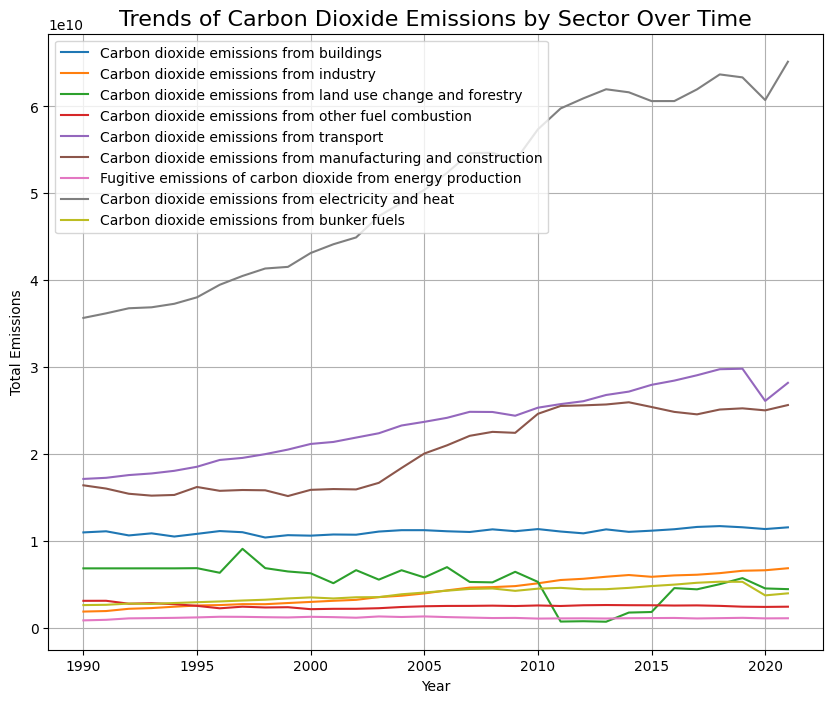

In [28]:
# Aggregate emissions by year
emission_cols = df.columns[3:]
emissions_by_year = df.groupby('Year')[emission_cols].sum()

# Plot trends over years
emissions_by_year.plot(figsize=(10, 8))
plt.title("Trends of Carbon Dioxide Emissions by Sector Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


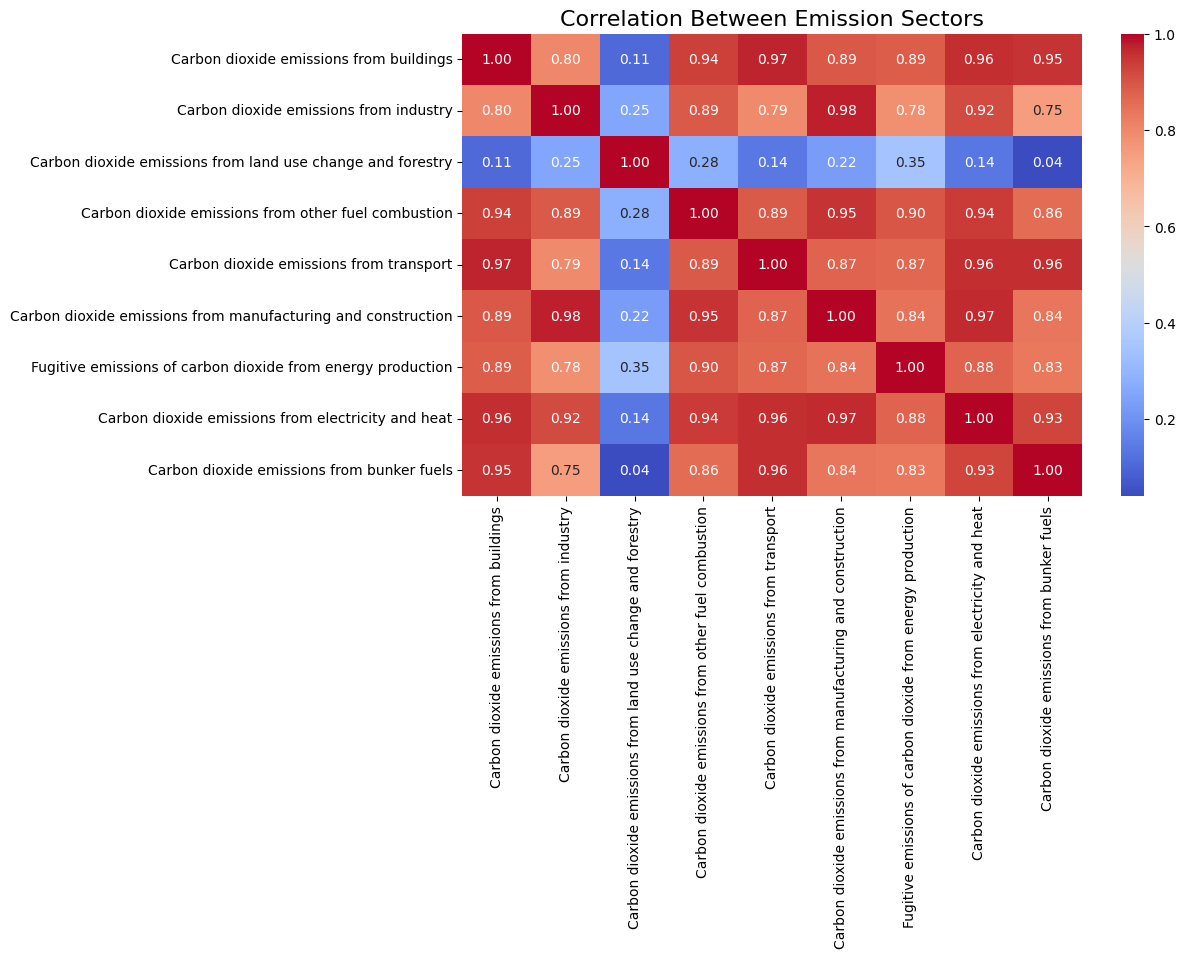

In [31]:
import seaborn as sns
# Correlation matrix
corr_matrix = df[emission_cols].corr()

# Heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Emission Sectors", fontsize=16)
plt.show()


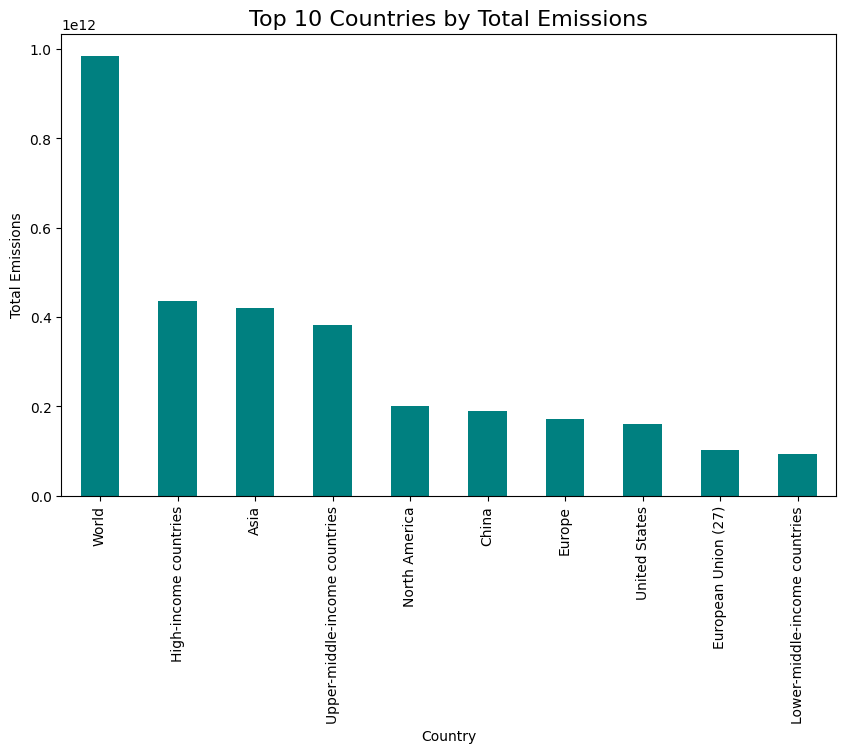

In [34]:
# Top 10 countries by total emissions
df['Total_Emissions'] = df[emission_cols].sum(axis=1)
top_countries = df.groupby('Entity')['Total_Emissions'].sum().sort_values(ascending=False).head(10)

# Bar plot
top_countries.plot(kind='bar', color='teal', figsize=(10, 6))
plt.title("Top 10 Countries by Total Emissions", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Total Emissions")
plt.xticks(rotation=90)
plt.show()

In [37]:
!pip install plotly


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
# Calculate the percentage change for each sector
df_sectors = ['Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
              'Carbon dioxide emissions from land use change and forestry',
              'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
              'Carbon dioxide emissions from manufacturing and construction',
              'Fugitive emissions of carbon dioxide from energy production', 'Carbon dioxide emissions from electricity and heat',
              'Carbon dioxide emissions from bunker fuels']

# Calculate the percentage change for each sector
df_percentage_change = df[df_sectors].pct_change() * 100
df_percentage_change['Year'] = df['Year']

In [44]:
# Calculate the percentage change for each sector
df_sectors = ['Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
              'Carbon dioxide emissions from land use change and forestry',
              'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
              'Carbon dioxide emissions from manufacturing and construction',
              'Fugitive emissions of carbon dioxide from energy production', 'Carbon dioxide emissions from electricity and heat',
              'Carbon dioxide emissions from bunker fuels']

# Calculate the percentage change for each sector
df_percentage_change = df[df_sectors].pct_change() * 100
df_percentage_change['Year'] = df['Year']

# Show the percentage change for the first few years
df_percentage_change.head()


,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990
1,7.692316,0.0,0.0,NaN,-4.123711,-7.017544,NaN,-6.250000,0.0,1991
2,7.142857,0.0,0.0,NaN,-20.430108,-26.415094,NaN,-33.333333,0.0,1992
3,6.666667,0.0,0.0,NaN,0.000000,-2.564103,NaN,0.000000,0.0,1993
4,0.000000,0.0,0.0,NaN,-1.351351,-5.263158,NaN,-5.000000,0.0,1994


In [52]:
# Get the mean percentage change for each sector across all years
sector_growth = df_percentage_change.mean()

# Display sectors with the highest and lowest growth
sector_growth.sort_values(ascending=False)

Year                                                            2005.500000
Carbon dioxide emissions from electricity and heat               397.746819
Carbon dioxide emissions from buildings                          299.723569
Carbon dioxide emissions from bunker fuels                       249.032857
Carbon dioxide emissions from manufacturing and construction     185.630083
Carbon dioxide emissions from transport                           85.507382
Carbon dioxide emissions from other fuel combustion               82.792580
Carbon dioxide emissions from land use change and forestry        81.955191
Carbon dioxide emissions from industry                            60.973629
Fugitive emissions of carbon dioxide from energy production       22.587644
dtype: float64

In [53]:
# Fill missing values (forward fill) for the sectors before calculating percentage change
df_filled = df[df_sectors].fillna(method='ffill')

# Or, if you'd prefer to drop rows with missing values:
# df_cleaned = df.dropna(subset=df_sectors)

# Now, calculate the percentage change on the cleaned or filled data
df_percentage_change = df_filled.pct_change() * 100

# Include the 'Year' column to the percentage change dataframe
df_percentage_change['Year'] = df['Year']

# Replace infinity values with NaN
df_percentage_change.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Handle NaN values after percentage change calculation (fill or drop)
df_percentage_change = df_percentage_change.fillna(0)  # or df_percentage_change.dropna()

# Show the cleaned data
df_percentage_change.head()


C:\Users\sumit\AppData\Local\Temp\ipykernel_13092\1170034967.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Year
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1990
1,7.692316,0.0,0.0,0.0,-4.123711,-7.017544,0.0,-6.250000,0.0,1991
2,7.142857,0.0,0.0,0.0,-20.430108,-26.415094,0.0,-33.333333,0.0,1992
3,6.666667,0.0,0.0,0.0,0.000000,-2.564103,0.0,0.000000,0.0,1993
4,0.000000,0.0,0.0,0.0,-1.351351,-5.263158,0.0,-5.000000,0.0,1994


In [55]:
!pip install nbformat



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


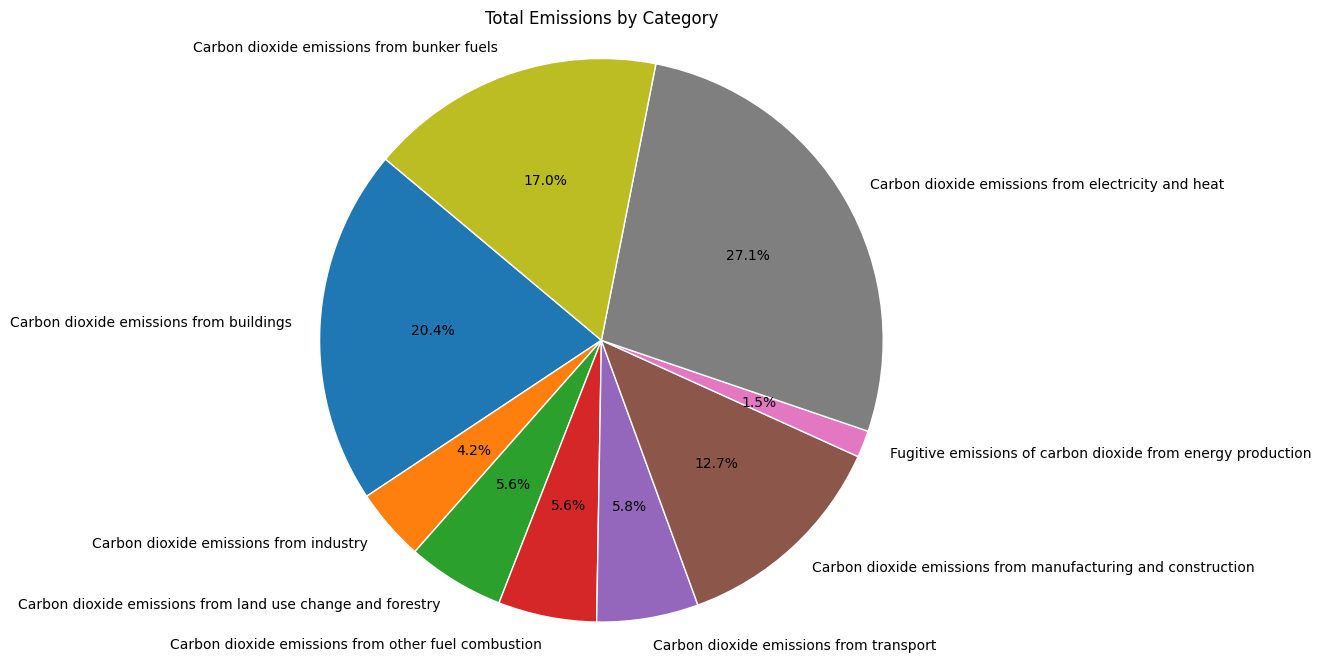

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the sum of emissions for each category across all years
emission_sums = df_percentage_change.drop(columns=['Year']).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    emission_sums.values,
    labels=emission_sums.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Total Emissions by Category")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


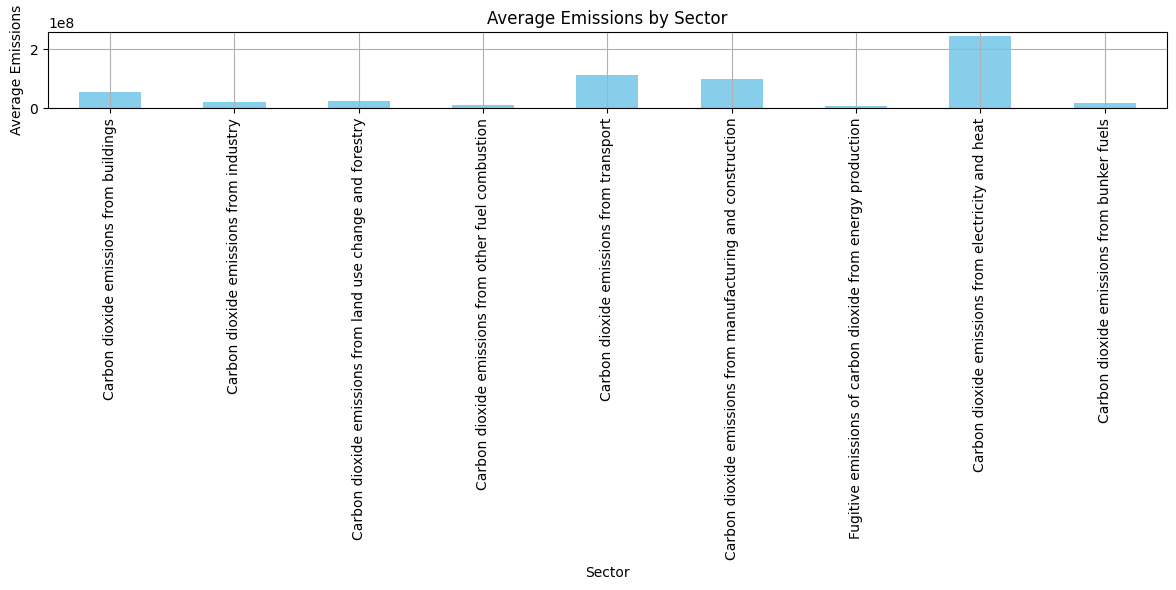

In [61]:
# Summarize emissions across sectors
sector_emissions = df[df_sectors].mean()  # Using mean emissions over the years for comparison

# Create a bar plot to compare emissions by sector
plt.figure(figsize=(12, 6))
sector_emissions.plot(kind='bar', color='skyblue')
plt.title('Average Emissions by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
df

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Total_Emissions
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,0.0,320000.0,20000.00,-330000.01
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,0.0,300000.0,20000.00,-420000.00
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,0.0,200000.0,20000.00,-840000.00
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,0.0,200000.0,20000.00,-840000.00
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,0.0,190000.0,20000.00,-880000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,1070000.00,470000.0,87160000.0,250000.0,2000000.0,1240000.0,0.0,5100000.0,129999.99,97419999.99
6556,Zimbabwe,ZWE,2018,1030000.00,560000.0,87160000.0,320000.0,2620000.0,1540000.0,0.0,5400000.0,160000.00,98790000.00
6557,Zimbabwe,ZWE,2019,890000.00,470000.0,87160000.0,280000.0,2240000.0,1610000.0,0.0,4990000.0,160000.00,97800000.00
6558,Zimbabwe,ZWE,2020,970000.00,500000.0,87160000.0,340000.0,1510000.0,1400000.0,0.0,3840000.0,60000.00,95780000.00


In [63]:
df_sector = df[['Year', 'Fugitive emissions of carbon dioxide from energy production']]

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called df
# We will focus on the 'Carbon dioxide emissions from electricity and heat' for LSTM prediction

df_sector = df[['Year', 'Carbon dioxide emissions from electricity and heat']].copy()

# Handle missing values if any (e.g., drop or fill missing values)
df_sector = df_sector.dropna()

# Normalize the data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df_sector['Value'] = scaler.fit_transform(df_sector[['Carbon dioxide emissions from electricity and heat']])

# Create time series data for LSTM model
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])  # Input features (past time_step values)
        y.append(data[i + time_step, 0])      # Target value (next time step)
    return np.array(X), np.array(y)

# Convert the 'Value' column to a numpy array
dataset = df_sector['Value'].values
dataset = dataset.reshape(-1, 1)

# Choose a time step (e.g., 5 years for prediction)
time_step = 5
X, y = create_dataset(dataset, time_step)

# Reshape X to be compatible with LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# LSTM layer with dropout regularization
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))  # Predict the next time step (emission)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0011
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2949e-04
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1781e-04
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1236e-04
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9253e-04
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9107e-04
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.3777e-04
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.8927e-04
Epoch 9/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0336e-04
Epoch 10/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4952e-04
Epoch 11/50
 81/164 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3218e-04

KeyboardInterrupt: 